# Week 06, Part 4

### Topic
 1. Rolling dice again
 1. BACK TO SLIDES FOR BINOMIAL DISTRIBUTION AND THE NORMAL DISTRIBUTION
 1. Aside: rbinom
 1. Binomial distribution examples
    1. Example: dorm rooms
    1. Example: dialing telephones
    1. Example: silver pistons


In [1]:
# resize
require(repr)
options(repr.plot.width=4, repr.plot.height=4, repr.plot.res=300)

Loading required package: repr

Warning message:
“package ‘repr’ was built under R version 3.6.3”


## 1. Rolling dice again

Let's say you are playing a game in which you want to roll a majority of 1's out of 6 sized die.  So, if you have 10 rolls, you want to roll 5 or more ones let's see how likely this is.

Here, success is rolling a 1 - on a fair die this is simply 1 out of 6:

In [2]:
p = 1/6

Let's start by having a game of 10 throws:

In [3]:
nToss = 10

What do we have to plot this?

In [4]:
help(dbinom)

Hey!  that looks familiar!  

Turns out R has a bunch of helper functions for the binomial distribution too!

Ok, so our sequence now, instead of "x" which was our Z-scores, it is k-successes.  Let's say we want to see how many successes we get up to nToss throws:

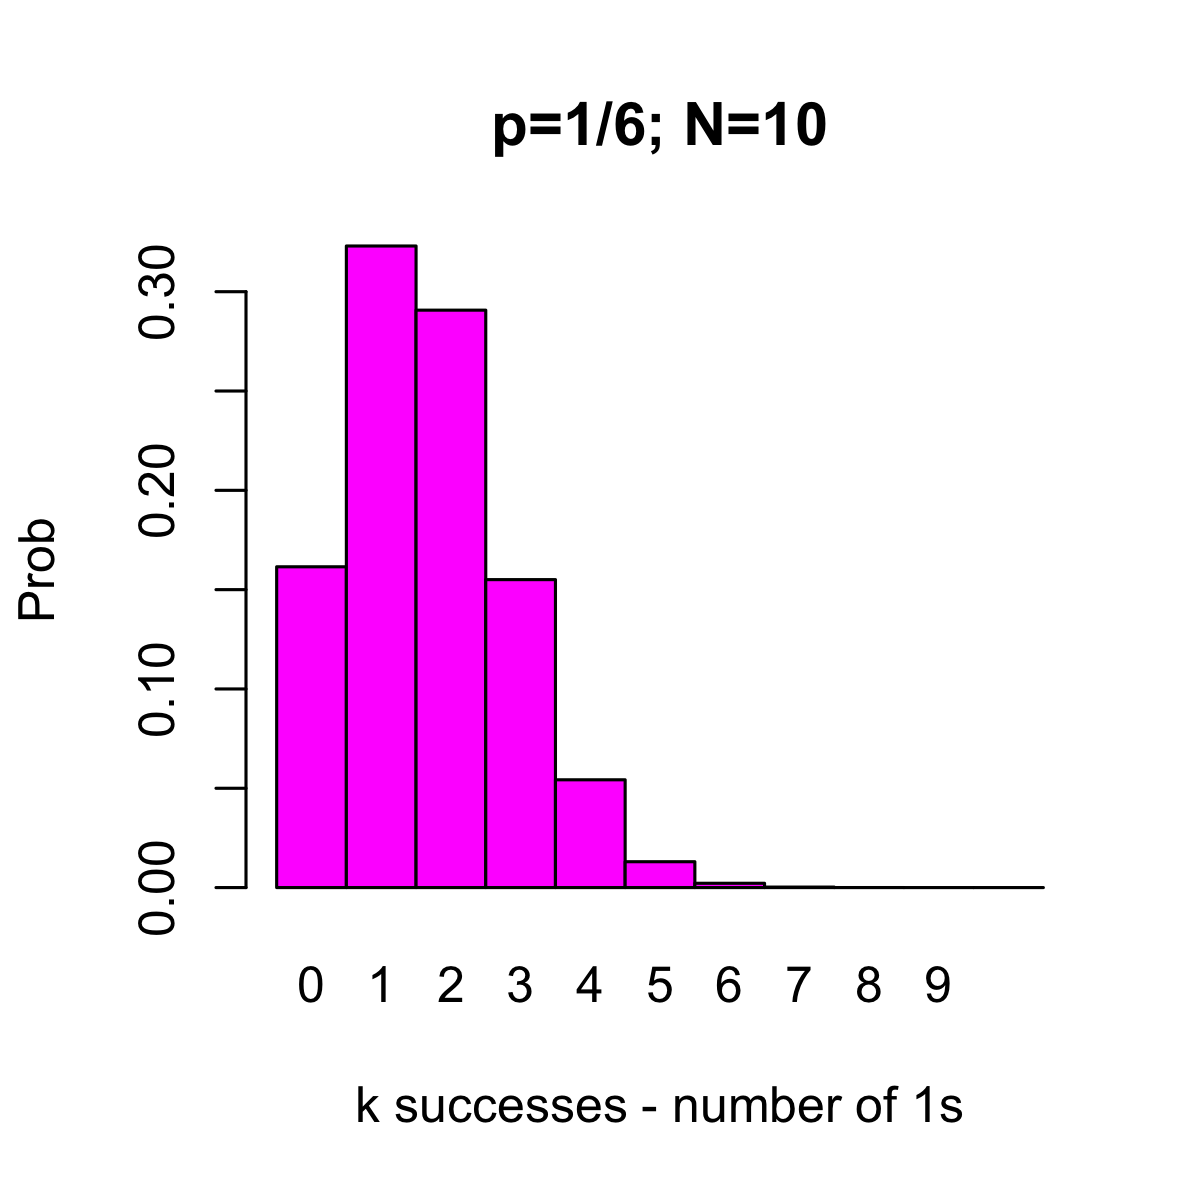

In [5]:
k_suc = seq(0,nToss) # note: we can only have whole numbers
barplot(dbinom(k_suc,size=nToss, prob=p), width=1, names.arg=k_suc, col='magenta', 
        xlab = 'k successes - number of 1s', 
        ylab = 'Prob',
        main='p=1/6; N=10', 
        space=0) # Note this space=0 is key to making our axis line up to our measurement!

What does this graph represent again?

This is the probability of getting k number of 1s if we roll a total of N=10 times. For example: the probability of not rolling a 1 at all in the game, out of 10 is ~0.15 or 15%.

Probability of rolling only one 1?  That is k=1, or about ~0.35, 35%.

Let's plot our critera for winning - i.e. rolling 50% or more 1s.

In our game of 10 tosses, this is 5 or greater rolls of a 1.

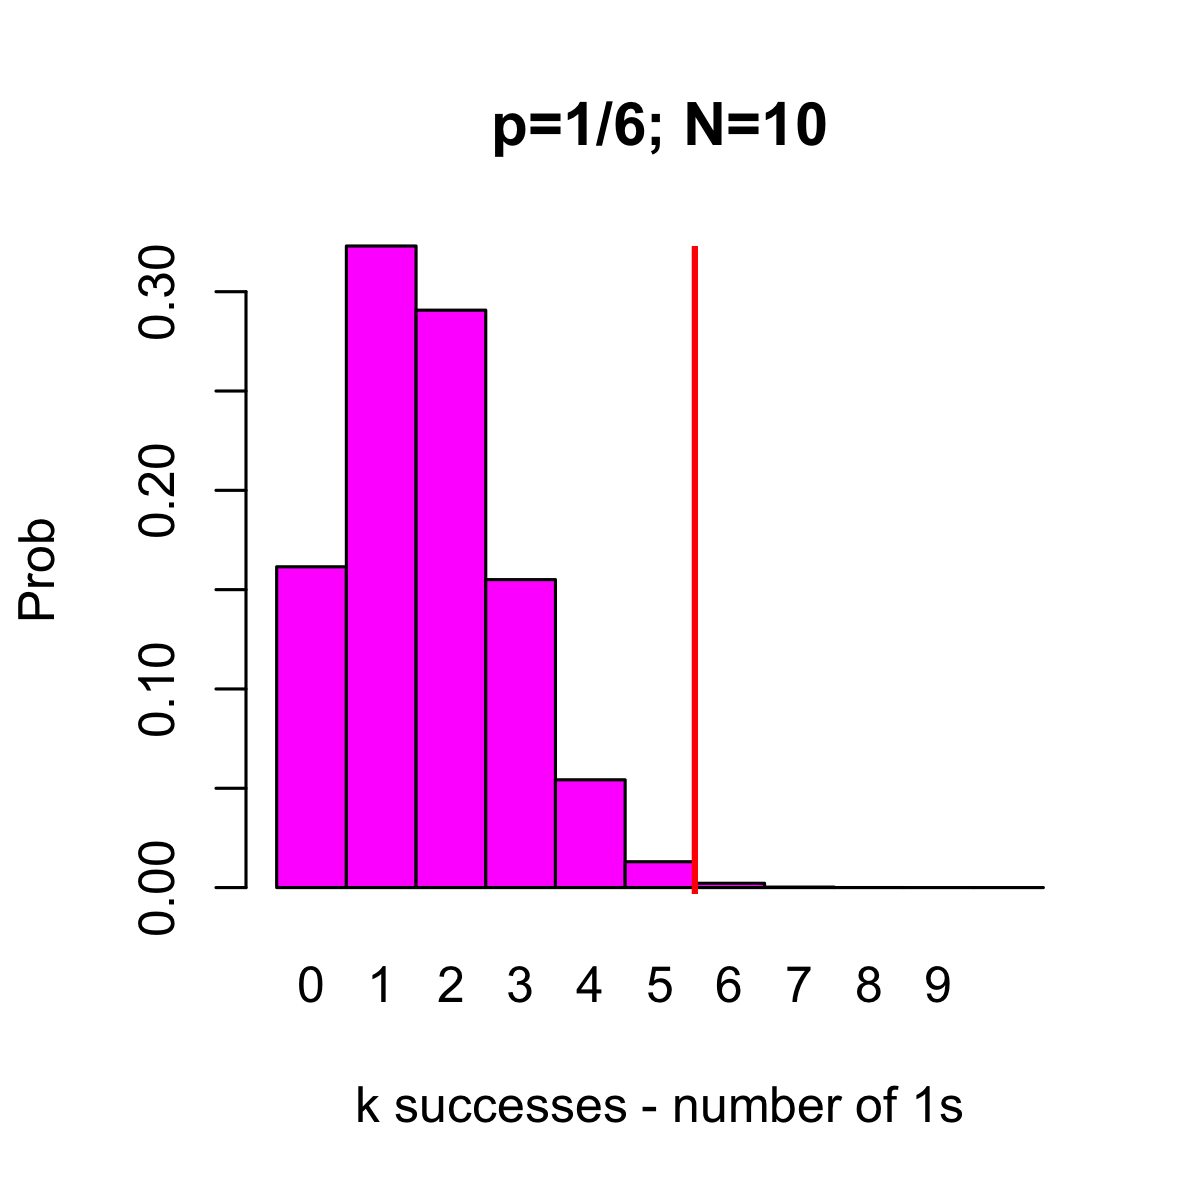

In [6]:
barplot(dbinom(k_suc,size=nToss, prob=p), width=1, names.arg=k_suc, col='magenta', 
        xlab = 'k successes - number of 1s', 
        ylab = 'Prob',
        main='p=1/6; N=10', 
        space=0) # Note this space=0 is key to making our axis line up to our measurement!

abline(v=nToss*0.5+1, col='red', lw=2)

Why +1? because we are starting our bars at 0 so we need to move 6 spaces!

By eye we can see, the probability of >5 sucesses out of 10 throws is VERY small. We can even quantify this with:

In [7]:
print('Prob of majority of tosses being 1s = ')
print(1-pbinom(nToss*0.5, size=nToss, prob=p))

[1] "Prob of majority of tosses being 1s = "
[1] 0.002438156


Note: 1- since we are looking for >, can also use `lower.tail` flip.

What about if we toss 5 times? 100 times? *DO THIS ON YOUR OWN*

We see as n gets bigger, the situation gets worse! This is because we have an unlikely event = p < 0.5.

The situation is reversed for p > 0.5 *GO BACK AND DO ON YOUR OWN*

This is because the binomial distribution loses its skew for large n $\rightarrow$ becomes more symmetric!

What distribution does it start to look like...?  We'll come back to this later!

We now want to talk about the mean & SD of this distribution.

## 2. BACK TO SLIDES FOR BINOMIAL DISTRIBUTION AND THE NORMAL DISTRIBUTION

## 3. Aside: rbinom

This is just for the reader's interest, we won't cover in class.

Let's say I have 10 coins and I flip them all & ask if I get heads (1) or tails (2). This is the same thing as asking if I flip 1 coin 10 times.

Let's also say they have == probability

`rbinom(number of coins, number of times I flip all coins, probability of success)`

In [8]:
outcomes = rbinom(n=10, size=1, prob=0.5)
print(outcomes)

 [1] 1 0 1 1 1 0 1 0 0 0


Running the above a few times shows us that we get random heads or tails ~5 each.

## 4. Binomial distribution examples


### Example 1: 
Suppose a university announced that it admitted 2,500 students for the following year’s freshman class. However, the university has dorm room spots for only 1,786 freshman students. If there is a 70% chance that an admitted student will decide to accept the offer and attend this university, what is the approximate probability that the university will not have enough dormitory room spots for the freshman class?

**Step 1:** can we use the normal model?

In [9]:
n = 2500
p = 0.7
print(n*p)
print(n*(1-p))

[1] 1750
[1] 750


Both are > 10 so we are good to go!

**Step 2:** Calculate mean and SD

In [10]:
normal_mean = n*p
normal_sd = (n*p*(1-p))**0.5

**Step 3:** Use normal distribution to find this probability as a percentile

In [11]:
prob_norm = pnorm(1786,mean=normal_mean, sd=normal_sd, lower.tail=FALSE) # false because P(k>___)
print(prob_norm)

[1] 0.05807172


Note: we could have also just as easily used R to do the binomial calculation:

In [12]:
prob_binom = pbinom(1786, size=2500, prob=0.7, lower.tail=FALSE)
print(prob_binom)

[1] 0.05506358


So we can see they are very close to the same (even if slightly off)

### Example 2: 
When telephones were just invented, there was a probability of 80% of success in any attempt to make a telephone call. What is the probability of 7 successful calls in 10 attempts?

We can't use the normal model here since it small number stats.

Because the binomial model is *discrete* we can actually use the "dbinom" function directly:

In [13]:
n = 10
p = 0.8
prob = dbinom(7, size=n, prob=p)
print(prob)

[1] 0.2013266


Note that this is a feature of the binomial distribution and is not true of the normal distribution!  The binomial distribution lives in a weird "inbetween" space of discrete and continuous.

### Example 3:
A manufacturer of silver pistons finds that on the average, 12% of her pistons are rejected because they are either oversize or undersize. 
What is the probability that a batch of 10 pistons will contain
  1. no more than 2 rejects?
  1. at least 2 rejects?


In [14]:
n = 10
p = 0.12 # note, here success = rejection!

  1. 2 or less: so 0, 1, 2 rejects

We could do:

In [15]:
prob_way1 = dbinom(0,size=n,prob=p) + dbinom(1,size=n,prob=p) + dbinom(2, size=n,prob=p)
print(prob_way1)

[1] 0.8913182


OR

In [16]:
prob_way2 = pbinom(2,size=n, prob=p)
print(prob_way2)

[1] 0.8913182


NOTE: we are asked for P(<= 2).  What if asked "probability of less than 2 rejects?) *THINK ON IT*

  2. at least 2 rejects: so 2, 3, 4, 5, 6, 7, 8, 9, 10
  
We could do what we did before but for many more additions of dbinom or... we can note: P($\geq 2$ rejects) = 1 - P($\leq$ 1 reject)

way 1:

In [17]:
prob_way1 = 1-(dbinom(0,size=n,prob=p) + dbinom(1,size=n,prob=p))
print(prob_way1)

[1] 0.341725


OR

In [19]:
prob_way2 = 1-pbinom(1,size=n, prob=p)
print(prob_way2)  

[1] 0.341725


OR

In [20]:
prob_way3 = pbinom(1,size=n, prob=p,lower.tail=FALSE)
print(prob_way3)  

[1] 0.341725
